# Titantic EDA

## Goal: Predict whether a given PassengerId survived or not.

### Classification problem

## Imports

In [5]:
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import chisquare

In [6]:
df = pd.read_csv("data/train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test = pd.read_csv("data/test.csv") # No Survived column - Use this to generate final predictions
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df.shape

(891, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing data in features: Cabin, Age and Embarked

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### PassengerId is just the unique identifier of the sample in a dataset

In [12]:
df["PassengerId"].nunique()

891

### Regressive

* Fare
* Age
* SibSp - this is the number of siblings/spouses a passenger had onboard
* Parch - this is the number of parents/children a passenger had onboard

### Categorical

* Pclass
* Embarked
* Cabin
* Ticket
* Sex

### Undetermined

* Name


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Correlation between regressive variables

There is some correlation between the regressive variables but nothing significant to warrant leaving a feature out.

In [14]:
cont_features = ["Fare", "Age", "SibSp", "Parch"]

In [15]:
df[["Survived"] + cont_features].corr()

,Survived,Fare,Age,SibSp,Parch
Survived,1.000000,0.257307,-0.077221,-0.035322,0.081629
Fare,0.257307,1.000000,0.096067,0.159651,0.216225
Age,-0.077221,0.096067,1.000000,-0.308247,-0.189119
SibSp,-0.035322,0.159651,-0.308247,1.000000,0.414838
Parch,0.081629,0.216225,-0.189119,0.414838,1.000000


array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>],
       [<AxesSubplot:xlabel='Survived', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Fare', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot:xlab

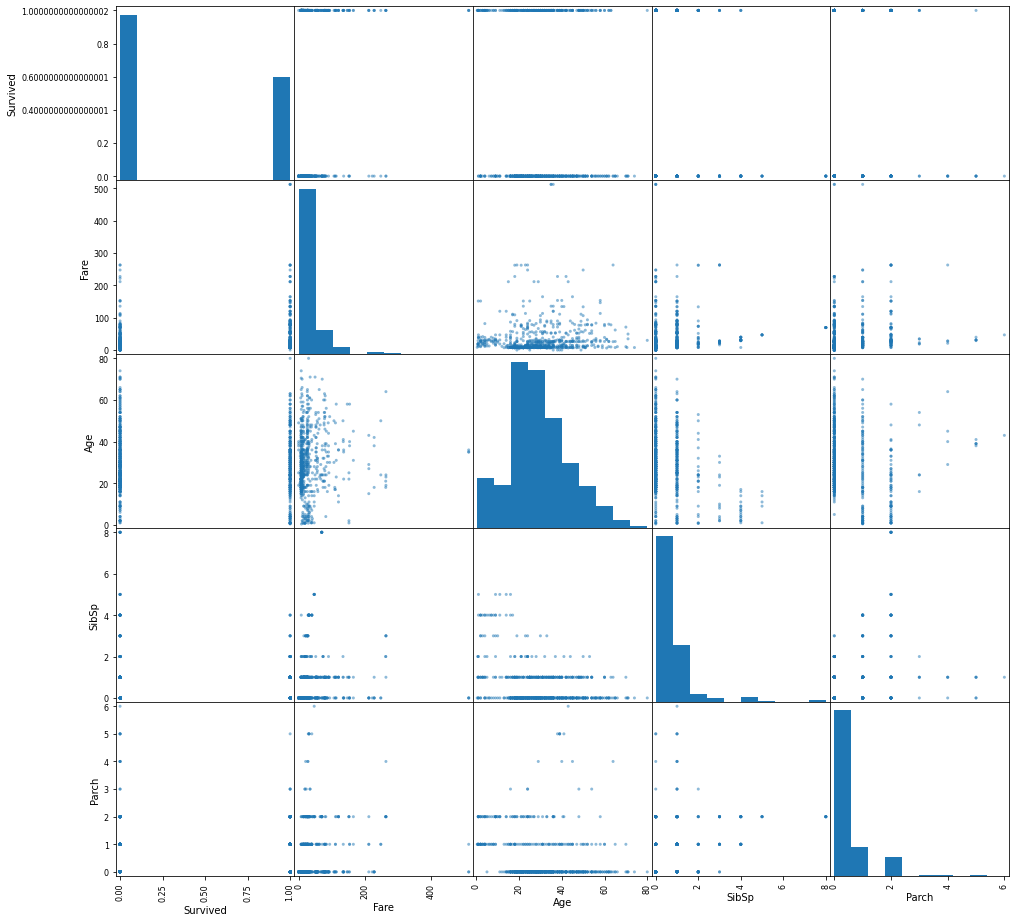

In [16]:
scatter_matrix(df[["Survived"] + cont_features], figsize=(16, 16))

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

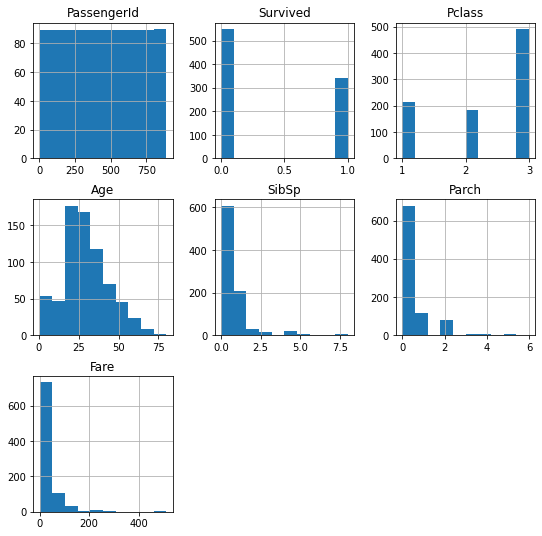

In [17]:
df.hist(figsize=(9, 9))

### Correlation between categorical features

In [18]:
cat_features = ["Pclass", "Embarked", "Cabin", "Ticket", "Sex", "Survived"]

In [19]:
df_cat = df[cat_features]

#### ANOVA

In [20]:
F, p = stats.f_oneway(df_cat[df_cat["Pclass"] == 1].Survived, df_cat[df_cat["Pclass"] == 2].Survived)

In [21]:
F

10.103587293685537

In [22]:
p

0.0015954656668377672

#### $\chi^2$ Test

In [23]:
df_cat = df_cat.apply(lambda x : pd.factorize(x)[0]) + 1

In [ ]:
pd.DataFrame([chisquare(df_cat[x].values, f_exp=df_cat.values.T, axis=1)[0] for x in df_cat])

In [ ]:
df_cat.head()

,Pclass,Embarked,Cabin,Ticket,Sex,Survived
0,1,1,0,1,1,1
1,2,2,1,2,2,2
2,1,1,0,3,2,2
3,2,1,2,4,2,2
4,1,1,0,5,1,1


## Dealing with Missing features

Cabin, Age, Embarked

In [26]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [28]:
df["Cabin"].isnull().sum()

687

In [29]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Probably the letter of the Cabin at the start represents ship level / section on a ship.  
Idea: Keep the letter and categorise - drop the numbers - create a new category for NaNs?

In [33]:
df["ship_section"] = df["Cabin"].fillna("U").str[0] # "U" for unknown.

In [34]:
df["ship_section"].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: ship_section, dtype: int64

In [39]:
df["Age"].isnull().sum()

177

Lets try imputing the age with the median value based on the assumed ship section.

In [42]:
df["Age"].fillna(df.groupby("ship_section")["Age"].transform("mean"))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.555293
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [35]:
df["Embarked"].isnull().sum()

2

As there are just two nulls for Embarked and no way of determining where they embarked we will drop these samples.

In [ ]:
df.dropna() # But how to handle incoming samples where this may be missing?